In [ ]:
# Add your imports here

import os
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
project_path = os.getcwd() + '/'

browser_data_path = 'data/'
pycharm_data_path = project_path + 'hw_1/data/'

# selected_data_path = browser_data_path
selected_data_path = pycharm_data_path

fr_dish_choice_data_path = selected_data_path + 'Friends_Dish_Choices.txt'
fr_relation_data_path = selected_data_path + 'Friends_Relation.txt'

In [3]:
def parse_custom(file_path):
    with open(file_path) as f:
        file_content = f.readlines()
        
    return [x.strip('\n').strip('\r').split('\t')[1:] for x in file_content][1:]


In [4]:
fr_dish_choice_file_content = parse_custom(fr_dish_choice_data_path)

list_of_friends = set([item[0] for item in fr_dish_choice_file_content])

# fr_dish_choice_file_content_nodes = set([item for sublist in fr_dish_choice_file_content for item in sublist])

# print fr_dish_choice_file_content_nodes


In [5]:
G_fr_dish_choice = nx.Graph()

# G_fr_dish_choice.add_nodes_from(fr_dish_choice_file_content_nodes)

for relationship in fr_dish_choice_file_content:
    G_fr_dish_choice.add_edge(relationship[0], relationship[1])

print G_fr_dish_choice.edges()

[('Laiba', 'Karahi'), ('Laiba', 'Fish'), ('Laiba', 'Mandi'), ('Vali', 'Suji Halwa'), ('Vali', 'Nihari'), ('Vali', 'Seekh Kabab'), ('Jahanzaib', 'Karahi'), ('Jahanzaib', 'Fish'), ('Jahanzaib', 'Mandi'), ('Anas', 'Chicken Handi'), ('Anas', 'Afgani Tikkah'), ('Anas', 'Mandi'), ('Sindhi Biryani', 'Ghaffar'), ('Sindhi Biryani', 'Chand'), ('Ghaffar', 'Afgani Tikkah'), ('Ghaffar', 'Mutton Pulao'), ('Seekh Kabab', 'Paras'), ('Seekh Kabab', 'Faiza'), ('Daal Chawal', 'Paras'), ('Paras', 'Chicken Handi'), ('Chicken Handi', 'Faiza'), ('Chand', 'Afgani Tikkah'), ('Chand', 'Mutton Pulao'), ('Faiza', 'Suji Halwa')]


In [6]:
def getNodeType(node):
    if node in list_of_friends:
        return 'Friend'
    else:
        return 'Dish'


In [7]:
for node in G_fr_dish_choice.nodes():
    G_fr_dish_choice.node[node]['type'] = getNodeType(node)

print G_fr_dish_choice.nodes(data=True)

[('Laiba', {'type': 'Friend'}), ('Vali', {'type': 'Friend'}), ('Jahanzaib', {'type': 'Friend'}), ('Anas', {'type': 'Friend'}), ('Sindhi Biryani', {'type': 'Dish'}), ('Ghaffar', {'type': 'Friend'}), ('Seekh Kabab', {'type': 'Dish'}), ('Fish', {'type': 'Dish'}), ('Daal Chawal', {'type': 'Dish'}), ('Paras', {'type': 'Friend'}), ('Karahi', {'type': 'Dish'}), ('Nihari', {'type': 'Dish'}), ('Chicken Handi', {'type': 'Dish'}), ('Chand', {'type': 'Friend'}), ('Faiza', {'type': 'Friend'}), ('Afgani Tikkah', {'type': 'Dish'}), ('Mandi', {'type': 'Dish'}), ('Suji Halwa', {'type': 'Dish'}), ('Mutton Pulao', {'type': 'Dish'})]


In [8]:
friends, dishes = nx.bipartite.sets(G_fr_dish_choice)

G_bipartite_dishes = nx.bipartite.weighted_projected_graph(G_fr_dish_choice, dishes)

G_bipartite_friends = nx.bipartite.weighted_projected_graph(G_fr_dish_choice, friends)


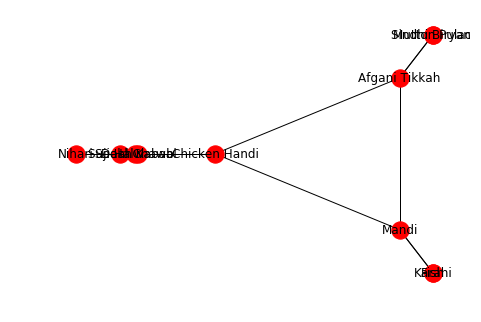

In [9]:
nx.draw_spectral(G_bipartite_dishes, with_labels=True)

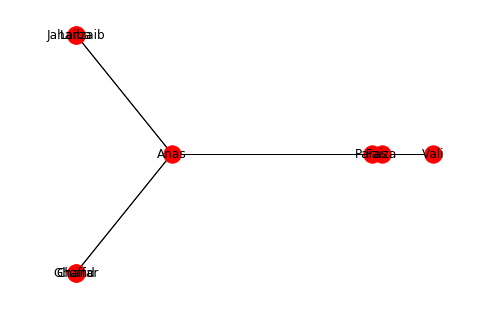

In [10]:
nx.draw_spectral(G_bipartite_friends, with_labels=True)

The triadic closure gives us a measure about how interlinked a particular graph is. A higher value often indicates that the graph is well interlinked where many nodes are connected to each other, hence it's a tightly knitted group or area. A low value can often times indicate area which needs to be focused or looked into as there is potential for future links aur relationships to be established.

An example can be of an e-commerce site where users buy products. Recommendation systems can look into users who buy a particular kind of product also buy another particular kind of product with it, so users who fall into that category but don't buy the other product can be recommended this particular product.

In [11]:
fr_relation_file_content = parse_custom(fr_relation_data_path)

G_fr_relation_choice = nx.Graph()

for nodes in fr_relation_file_content:
    G_fr_relation_choice.add_edge(nodes[0], nodes[1])

print G_fr_relation_choice.edges()

[('Vali', 'Anas'), ('Vali', 'Ghaffar'), ('Vali', 'Paras'), ('Vali', 'Laiba'), ('Vali', 'Chand'), ('Vali', 'Faiza'), ('Vali', 'Jahanzaib'), ('Anas', 'Laraib'), ('Anas', 'Ghaffar'), ('Anas', 'Paras'), ('Anas', 'Chand'), ('Anas', 'Faiza'), ('Anas', 'Jahanzaib'), ('Ghaffar', 'Paras'), ('Ghaffar', 'Chand'), ('Ghaffar', 'Faiza'), ('Ghaffar', 'Jahanzaib'), ('Ghaffar', 'Laraib'), ('Paras', 'Laiba'), ('Paras', 'Chand'), ('Paras', 'Faiza'), ('Paras', 'Jahanzaib'), ('Chand', 'Faiza'), ('Chand', 'Jahanzaib'), ('Chand', 'Laraib'), ('Faiza', 'Jahanzaib'), ('Faiza', 'Laraib'), ('Jahanzaib', 'Laraib')]


In [15]:
for node in G_fr_relation_choice.nodes():
    print node, '\t', nx.clustering(G_fr_relation_choice, node)

Vali 	0.761904761905
Anas 	0.904761904762
Ghaffar 	0.904761904762
Paras 	0.761904761905
Laiba 	1.0
Chand 	0.904761904762
Faiza 	0.904761904762
Jahanzaib 	0.904761904762
Laraib 	1.0


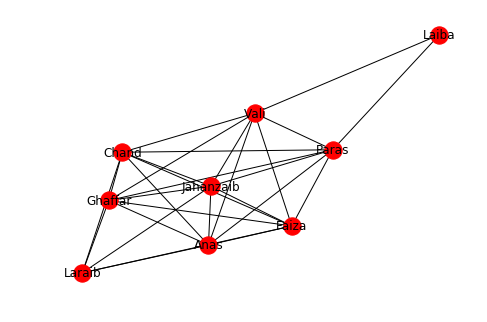

In [22]:
nx.draw(G_fr_relation_choice, with_labels=True)

The local clustering of each of the individual nodes suggest that most nodes are interlinked with one another and friends of friends are also friends amongst themselves. Vali's and Paras' friends though have the potential to be introduced to more new people like for example Chand and Laiba can be introduced to each other via Vali or Paras

In [19]:
print 'Average Global Clustering', '\t', nx.average_clustering(G_fr_relation_choice)

Average Global Clustering 	0.89417989418


In [20]:
print 'Transitivity Global Clustering', '\t', nx.transitivity(G_fr_relation_choice)

Transitivity Global Clustering 	0.873417721519


Both the average and transitivity global cluster are relatively high and approximately the same which indicates that the most nodes have a high local clustering coefficient and also that high degree nodes also have high local clustering coefficient. This tells us that this is a relatively tightly knitted graph. 